In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Select features and target variable
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
X_train = train_data[features].copy()
y_train = train_data['SalePrice']
X_test = test_data[features].copy()

# Feature Engineering: Adding interactions between features
X_train['GrLivArea_BedroomAbvGr'] = X_train['GrLivArea'] * X_train['BedroomAbvGr']
X_test['GrLivArea_BedroomAbvGr'] = X_test['GrLivArea'] * X_test['BedroomAbvGr']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_scaled, y_train, test_size=0.3, random_state=45)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_split, y_train_split)

# Make predictions on the validation set
y_val_pred = model.predict(X_val_split)

# Evaluate the model
mse = mean_squared_error(y_val_split, y_val_pred)
r2 = r2_score(y_val_split, y_val_pred)
mae = mean_absolute_error(y_val_split, y_val_pred)

print(f'Linear RegressionValidation MSE: {mse}')
print(f'Linear Regression Validation R^2: {r2}')
print(f'Linear Regression Validation MAE: {mae}')




Linear RegressionValidation MSE: 2632119538.0929418
Linear Regression Validation R^2: 0.5794920213534349
Linear Regression Validation MAE: 36701.95987341406


In [ ]:
# Hyperparameter tuning for Ridge Regression
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Train Ridge Regression with the best hyperparameters
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train_split, y_train_split)
y_val_pred_ridge = ridge.predict(X_val_split)

ridge_mse = mean_squared_error(y_val_split, y_val_pred_ridge)
ridge_r2 = r2_score(y_val_split, y_val_pred_ridge)
ridge_mae = mean_absolute_error(y_val_split, y_val_pred_ridge)

print(f'Ridge Regression Validation MSE: {ridge_mse}')
print(f'Ridge Regression Validation R^2: {ridge_r2}')
print(f'Ridge Regression Validation MAE: {ridge_mae}')


Ridge Regression Validation MSE: 2650822606.622611
Ridge Regression Validation R^2: 0.5765040151371223
Ridge Regression Validation MAE: 36740.57139856294


In [ ]:
# Make predictions on the test set using Ridge Regression
y_test_pred = ridge.predict(X_test_scaled)

# Output the first 10 predictions
predictions = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': y_test_pred})
print(predictions.head(10))

# Save the predictions to a CSV file
predictions.to_csv('house_price_predictions.csv', index=False)

     Id      SalePrice
0  1461  117918.170896
1  1462  140970.718276
2  1463  204839.833595
3  1464  202176.503737
4  1465  192726.289294
5  1466  207609.696648
6  1467  157752.161700
7  1468  187368.389724
8  1469  167631.811036
9  1470  116354.146263


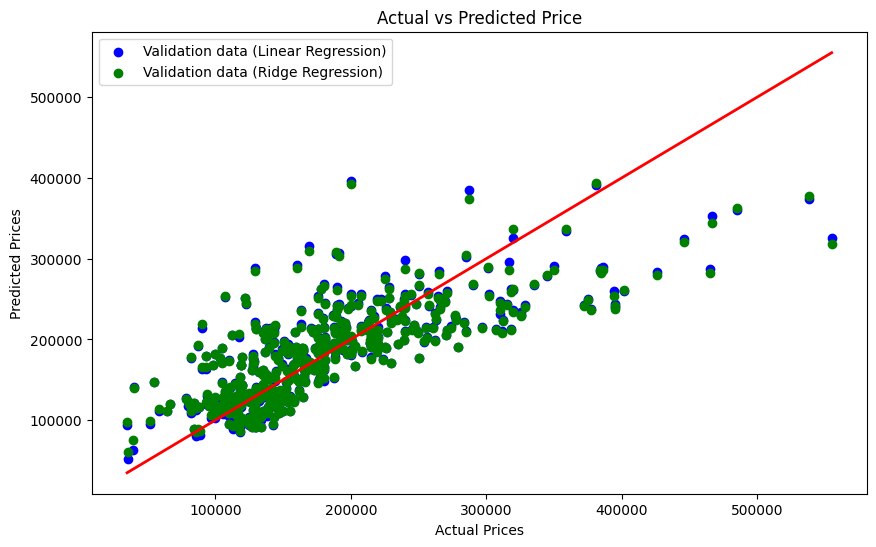

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_val_split, y_val_pred, color='blue', label='Validation data (Linear Regression)')
plt.scatter(y_val_split, y_val_pred_ridge, color='green', label='Validation data (Ridge Regression)')
plt.plot([min(y_val_split), max(y_val_split)], [min(y_val_split), max(y_val_split)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()

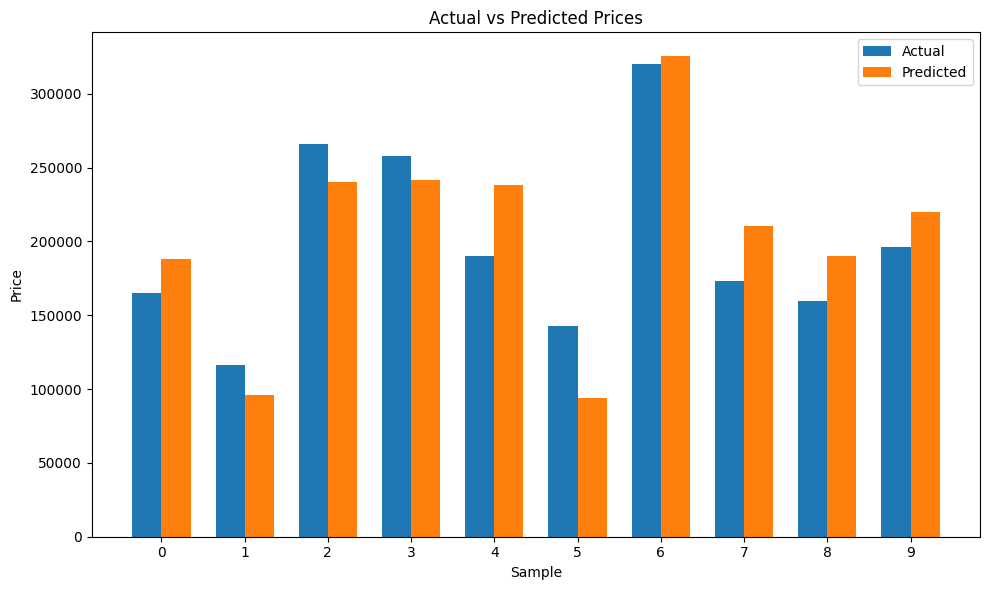

In [ ]:
# Bar Graph
n_samples = 10
x = np.arange(n_samples)
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, y_val_split[:n_samples], width, label='Actual')
rects2 = ax.bar(x + width/2, y_val_pred[:n_samples], width, label='Predicted')

ax.set_xlabel('Sample')
ax.set_ylabel('Price')
ax.set_title('Actual vs Predicted Prices')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()

fig.tight_layout()
plt.show()
